# Continuous Problems and Conjugate Families

## From discrete to continuous Bayesian problems

In most real applications, parameters are naturally treated as **continuous**. For example the proportion $\pi$ of people who can roll their tongue in a population. In principle, $\pi$ can take on any value in the interval $[0,1]$.

Conceptually, nothing changes in the Bayesian workflow:

1. We specify a **likelihood** model $p(y \mid \theta)$ for the data $y$ given parameters $\theta$.
2. We specify a **prior** distribution $p(\theta)$ over $\theta$.
3. We use **Bayes' theorem** to obtain the **posterior** $p(\theta \mid y)$.

The main difference is that, in the continuous case, we work with **probability densities** and **integrals** rather than
probability masses and sums.


## Binomial distribution: sampling model vs. likelihood

Suppose we observe a count $Y$ of “successes” in $n$ independent Bernoulli trials, each with success probability $\pi$.

The **binomial distribution** gives the probability of observing exactly $k$ successes:

$$
P(Y = k \mid \pi)
= \binom{n}{k} \, \pi^k (1-\pi)^{n-k},
\quad k = 0,1,\dots,n.
$$

This formula has two complementary interpretations:

- **Sampling model (data generating model)**:  
  If the “true” underlying proportion $\pi$ is known, the binomial distribution tells us how likely different data
  outcomes $k$ are.
- **Likelihood function**:  
  For fixed observed data $(n,k)$, we can view
  $$
  L(\pi \mid k, n) = P(Y = k \mid \pi)
  $$
  as a function of $\pi$. This tells us which parameter values $\pi$ make the observed data most likely.

The distinction between **sampling model** (probability of data given $\pi$) and **likelihood** (function of $\pi$ for
fixed data) is fundamental in both frequentist and Bayesian inference.


## Probability density functions (PDFs) and cumulative distribution functions (CDFs)

For **continuous** random variables, we work with **probability density functions** (PDFs) instead of mass functions.

Let $\Theta$ be a continuous random variable (e.g. a parameter such as $\pi$). Its PDF $p(\theta)$ must satisfy:

1. **Non-negativity**
   $$
   p(\theta) \ge 0 \quad \text{for all } \theta
   $$
2. **Normalization**
   $$
   \int_{-\infty}^{\infty} p(\theta)\, d\theta = 1
   $$

The associated **cumulative distribution function (CDF)** is

$$
F(\theta) = P(\Theta \le \theta)
= \int_{-\infty}^{\theta} p(t)\, dt.
$$

The **expectation** (mean) of $\Theta$ is

$$
\mathbb{E}[\Theta] = \int_{-\infty}^{\infty} \theta \, p(\theta)\, d\theta,
$$

and the **variance** is

$$
\operatorname{Var}(\Theta)
= \mathbb{E}\big[(\Theta - \mu)^2\big]
= \int_{-\infty}^{\infty} (\theta - \mu)^2 \, p(\theta)\, d\theta,
\quad \text{where } \mu = \mathbb{E}[\Theta].
$$

For parameters restricted to a smaller range (e.g. $\pi \in [0,1]$), the integration limits are adapted accordingly.


## Bayes' theorem for continuous parameters and marginalisation

Let $\theta$ be a continuous parameter (e.g. a proportion $\pi$) with prior density $p(\theta)$, and let $y$ denote
observed data with likelihood $p(y \mid \theta)$.

**Bayes' theorem (continuous form)** says that the posterior density is

$$
p(\theta \mid y)
= \frac{p(y \mid \theta)\, p(\theta)}{p(y)},
$$

where the **evidence** (or marginal likelihood) is

$$
p(y)
= \int p(y \mid \theta)\, p(\theta)\, d\theta.
$$

The denominator is a **marginalisation** over all possible parameter values $\theta$ — it averages the sampling
probability of the data over the prior distribution of $\theta$.

More generally, if we have a partition (or family) of hypotheses $H_i$ with prior probabilities $P(H_i)$, the discrete
version of the **law of total probability** is

$$
P(y)
= \sum_i P(y \mid H_i)\, P(H_i).
$$

In the continuous case, sums become integrals:

$$
p(y)
= \int p(y \mid \theta)\, p(\theta)\, d\theta.
$$

This marginalisation step is what makes many continuous problems analytically hard — the integral is often not available
in closed form.


## Beta distribution as a prior for proportions

For a probability parameter $\pi \in [0,1]$ (e.g. a proportion or success probability), a very common continuous prior
family is the **beta distribution**.

A random variable $\Pi$ has a beta distribution with shape parameters $\alpha > 0$ and $\beta > 0$,
written $\Pi \sim \operatorname{Beta}(\alpha,\beta)$, if its PDF is

$$
p(\pi \mid \alpha, \beta)
= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\,\Gamma(\beta)} \,
  \pi^{\alpha-1} (1-\pi)^{\beta-1},
\quad 0 \le \pi \le 1.
$$

Here $\Gamma(\cdot)$ is the **Gamma function**, a continuous generalization of the factorial:
$\Gamma(n) = (n-1)!$ for positive integers $n$.

Important summaries:

- **Mean**
  $$
  \mathbb{E}[\Pi] = \frac{\alpha}{\alpha + \beta}
  $$
- **Variance**
  $$
  \operatorname{Var}(\Pi)
  = \frac{\alpha \beta}{(\alpha+\beta)^2(\alpha+\beta+1)}.
  $$

Interpretation:

- $\alpha$ and $\beta$ control the **shape** and **concentration** of the prior.
- Roughly speaking, $\alpha + \beta$ acts like a **prior sample size**:  
  large $\alpha + \beta$ means a more concentrated (strongly informed) prior; smaller values mean a more diffuse (weakly
  informed) prior.


## Beta–binomial conjugate family

Consider the binomial sampling model

$$
P(Y = k \mid \pi)
= \binom{n}{k} \, \pi^k (1-\pi)^{n-k},
$$

and a beta prior for $\pi$,

$$
\pi \sim \operatorname{Beta}(\alpha,\beta).
$$

The **posterior** distribution for $\pi$ given data $(n,k)$ is again a beta distribution:

$$
\pi \mid (k,n) \sim \operatorname{Beta}(\alpha + k,\; \beta + n - k).
$$

This is the hallmark of a **conjugate family**: prior and posterior belong to the **same parametric family**.

The corresponding **posterior mean** is

$$
\mathbb{E}[\pi \mid k, n]
= \frac{\alpha + k}{\alpha + \beta + n}.
$$

This can be rewritten as a **weighted average** of

- the **prior mean** $\displaystyle \mu_{\text{prior}} = \frac{\alpha}{\alpha+\beta}$ and
- the **sample proportion** $\displaystyle \hat\pi_{\text{data}} = \frac{k}{n}$:

$$
\mathbb{E}[\pi \mid k, n]
= \frac{\alpha + \beta}{\alpha + \beta + n} \, \mu_{\text{prior}}
\;+\;
\frac{n}{\alpha + \beta + n} \, \hat\pi_{\text{data}}.
$$

So the posterior expectation is a **compromise** between prior belief and empirical data, where
$\alpha+\beta$ and $n$ play the role of **weights**.


## Principles of Bayesian inference illustrated by the beta–binomial case

The beta–binomial family highlights several general principles of Bayesian inference:

1. **Prior strength vs. data strength**  
   - When the prior is **weak** (small $\alpha+\beta$), the posterior is dominated by the **likelihood/data**.  
   - When the prior is **strong** (large $\alpha+\beta$), the posterior remains closer to the prior, and more data are
     needed to “overcome” it.

2. **Posterior as compromise**  
   The posterior distribution is always a compromise between **prior** and **likelihood**. This is reflected both
   in the posterior mean and in the posterior shape.

3. **Effect of additional data**  
   As $n$ grows larger,
   - the (scaled) likelihood becomes more concentrated (narrower), and
   - the posterior is pulled more towards the data.

   In the limit $n \to \infty$, the posterior is dominated by the data (under mild regularity conditions).

4. **Data order invariance**  
   For independent observations, it does **not** matter in which order they are processed:
   sequentially updating the posterior with subsets of data or updating once with all data yields the same posterior.

These properties are not unique to the beta–binomial case, but they are especially easy to see there due to the simple
analytic update rule.


## Conjugate prior–likelihood families

Let $\theta$ be a parameter and $y$ data. A **conjugate prior** family for a likelihood $p(y \mid \theta)$ is a family
of prior distributions $p(\theta \mid \eta)$, parameterized by some hyperparameters $\eta$, such that the **posterior**
belongs to the same family:

$$
p(\theta \mid y, \eta)
\;\propto\;
p(y \mid \theta)\, p(\theta \mid \eta)
\quad \text{is in the same family as } p(\theta \mid \eta).
$$

Informally,

> multiplying likelihood and prior produces another distribution of the same functional form as the prior.

Examples of conjugate pairs:

- **Binomial likelihood** + **Beta prior** $\to$ Beta posterior (beta–binomial family)
- **Poisson likelihood** + **Gamma prior** $\to$ Gamma posterior (gamma–Poisson family)
- **Normal likelihood** (for a mean) + **Normal prior** $\to$ Normal posterior (normal–normal family)
- **Uniform likelihood** on $[0,\theta]$ + **Pareto prior** $\to$ Pareto posterior (Pareto–uniform family)

**Advantages**:

- Closed-form update rules for the posterior.
- Easy computation of posterior summaries (mean, variance, etc.).

**Disadvantages**:

- Available only for relatively **simple models**.
- Restrict priors to **low-dimensional parametric families**, which may not always capture realistic prior knowledge.
- For many practical models, **no convenient conjugate prior** exists at all.

In those more complex cases, we use **numerical methods** (e.g. Markov Chain Monte Carlo) to approximate the posterior.


## Posterior simulation via joint sampling

Even when an analytic formula is available (as in the beta–binomial case), it's useful to think in terms of **simulation**.

One generic idea is:

1. Sample parameters $\theta_i$ from the prior $p(\theta)$.
2. For each $\theta_i$, sample data $y_i$ from the likelihood $p(y \mid \theta_i)$.
3. Keep only those $\theta_i$ for which $y_i$ equals (or is close to) the observed data $y_{\text{obs}}$.
4. The retained $\theta_i$ form a sample from the posterior $p(\theta \mid y_{\text{obs}})$.

In the simple beta–binomial example, this corresponds to:

- sampling $\pi_i \sim \operatorname{Beta}(\alpha,\beta)$,
- sampling $k_i \sim \operatorname{Binomial}(n,\pi_i)$,
- retaining only $\pi_i$ where $k_i = k_{\text{obs}}$.

This approach is called **posterior simulation via rejection** or (in hierarchical settings) **ancestral sampling**.
In practice, more efficient algorithms (such as MCMC) are used for complex models.


## Poisson distribution for counting processes

Many **counting processes** (number of arrivals, number of events in a time interval, etc.) are modeled with the
**Poisson distribution**.

A non-negative integer-valued random variable $Y$ has a Poisson distribution with rate parameter $\lambda > 0$,
denoted $Y \sim \operatorname{Poisson}(\lambda)$, if

$$
P(Y = y \mid \lambda)
= \frac{\lambda^y e^{-\lambda}}{y!},
\quad y = 0,1,2,\dots
$$

Important properties:

- **Mean**
  $$
  \mathbb{E}[Y] = \lambda
  $$
- **Variance**
  $$
  \operatorname{Var}(Y) = \lambda.
  $$

For independent observations $y_1,\dots,y_n$ assumed Poisson with the same rate $\lambda$, the **joint likelihood** is

$$
P(y_1,\dots,y_n \mid \lambda)
= \prod_{i=1}^{n} \frac{\lambda^{y_i} e^{-\lambda}}{y_i!}
= \left(\prod_{i=1}^{n} \frac{1}{y_i!}\right) \lambda^{\sum_{i=1}^{n} y_i} e^{-n \lambda}.
$$

Up to a constant factor not depending on $\lambda$, the kernel is

$$
\lambda^{\sum_i y_i} e^{-n\lambda}.
$$


## Gamma prior and the gamma–Poisson conjugate family

A common prior for a Poisson rate $\lambda > 0$ is the **gamma distribution**.

A random variable $\Lambda$ has a gamma distribution with shape $s > 0$ and rate $r > 0$,
written $\Lambda \sim \operatorname{Gamma}(s,r)$, if its PDF is

$$
p(\lambda \mid s,r)
= \frac{r^{s}}{\Gamma(s)} \, \lambda^{s-1} e^{-r\lambda},
\quad \lambda > 0.
$$

Summaries:

- **Mean**
  $$
  \mathbb{E}[\Lambda] = \frac{s}{r}
  $$
- **Variance**
  $$
  \operatorname{Var}(\Lambda) = \frac{s}{r^2}.
  $$

Combining a Poisson likelihood with a gamma prior yields the **gamma–Poisson conjugate family**.

Given independent observations $y_1,\dots,y_n \sim \operatorname{Poisson}(\lambda)$ and prior
$\lambda \sim \operatorname{Gamma}(s,r)$, the posterior is

$$
\lambda \mid y_1,\dots,y_n
\sim \operatorname{Gamma}\!\Big(s + \sum_{i=1}^{n} y_i,\; r + n\Big).
$$

Thus, the update rule is:

- **shape:** $s_{\text{posterior}} = s_{\text{prior}} + \sum_i y_i$  
- **rate:** $r_{\text{posterior}} = r_{\text{prior}} + n$

Again, prior and posterior are from the **same family**, illustrating conjugacy.


## Normal–normal conjugate family

The **normal distribution** plays a central role in statistics, partly due to the **central limit theorem** and partly
because it is a **maximum entropy** distribution under certain constraints.

The PDF of a normal distribution with mean $\mu$ and variance $\sigma^2$ is

$$
p(x \mid \mu,\sigma^2)
= \frac{1}{\sqrt{2\pi \sigma^2}}
  \exp\left( -\frac{(x-\mu)^2}{2\sigma^2} \right).
$$

Consider the following simple model:

- Data: $y_1,\dots,y_n$ are i.i.d. $\operatorname{Normal}(\mu, \sigma^2)$, with **known** variance $\sigma^2$.
- Prior for the mean: $\mu \sim \operatorname{Normal}(\mu_0, \tau_0^2)$.

The **likelihood** of the data given $\mu$ is

$$
p(y_1,\dots,y_n \mid \mu)
= \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}}
  \exp\left( -\frac{(y_i - \mu)^2}{2\sigma^2} \right).
$$

Multiplying likelihood and prior yields a **normal posterior** for $\mu$:

$$
\mu \mid y_1,\dots,y_n \sim \operatorname{Normal}(\mu_n, \tau_n^2),
$$

with

- **posterior variance**  
  $$
  \tau_n^2 = \left( \frac{1}{\tau_0^2} + \frac{n}{\sigma^2} \right)^{-1}
  $$

- **posterior mean**  
  $$
  \mu_n = \tau_n^2
          \left( \frac{\mu_0}{\tau_0^2} + \frac{n \, \bar y}{\sigma^2} \right),
  \quad \bar y = \frac{1}{n} \sum_{i=1}^n y_i.
  $$

As in the beta–binomial and gamma–Poisson cases, the posterior mean is a **weighted average** of the prior mean $\mu_0$
and the sample mean $\bar y$; the posterior variance is smaller than both prior and data variances, reflecting increased
information.


## Perspective on conjugate families

Although conjugate families (beta–binomial, gamma–Poisson, normal–normal, etc.) provide elegant **closed-form** solutions,
their role in modern Bayesian data analysis is more **conceptual** than practical:

1. They provide **clean, analytic examples** that make it easy to understand how priors, likelihoods, and data interact.
2. They introduce important **probability distributions** (beta, gamma, normal, Poisson, …) that are also crucial building
   blocks in more complex models.
3. They show how the posterior often becomes a **compromise** between prior and data, with explicit formulas for how
   prior strength and sample size interact.

For many realistic models, there is **no convenient conjugate prior**, and closed-form posteriors are unavailable. In those
cases, we turn to **numerical methods**, especially **Markov Chain Monte Carlo (MCMC)**, which can approximate the posterior
without relying on analytic conjugacy.

Even then, we typically still use **parametric distributions** (such as beta, gamma, and normal) for priors and likelihoods,
so the intuition developed from conjugate families remains extremely useful.


# Exercises

Import necessary libraries:

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import preliz as pz
from tqdm.auto import tqdm
plt.rcParams["figure.figsize"] = (15,3)

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/Users/marbetschar/Development/marbetschar/notes/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Exercise 1

In each situation below, tune a $\mathrm{Beta}(\alpha, \beta)$ model that accurately reflects the
given prior information and visualize it. In many cases, there is no single “right” answer, but
rather multiple “reasonable” answers.

Hint: Often you can constrain the possible values for $\alpha$ and $\beta$ using a given
expectation or variance:
$$
\mathbb{E}[\pi] = \frac{\alpha}{\alpha + \beta},
\qquad
\operatorname{Var}[\pi] = \frac{\alpha \beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}.
$$
This might save you time when trying out different values for $\alpha$ and $\beta$. If you are
not in the mood for calculations, you can simply try out different values.

### a)

Your friend applied to a job and tells you: “I think I have a $40\%$ chance of getting the job,
but I'm pretty unsure.” When pressed further, they put their chances between $20\%$ and
$60\%$.

$$E[\pi] = 0.4 = \frac{\alpha}{\alpha+\beta} \quad \Rightarrow \frac{\alpha}{\beta} = \frac{E[\pi]}{1-E[\pi]} = \frac23$$

Try out different values given the constraint above:

alpha = 10.0, beta = 15


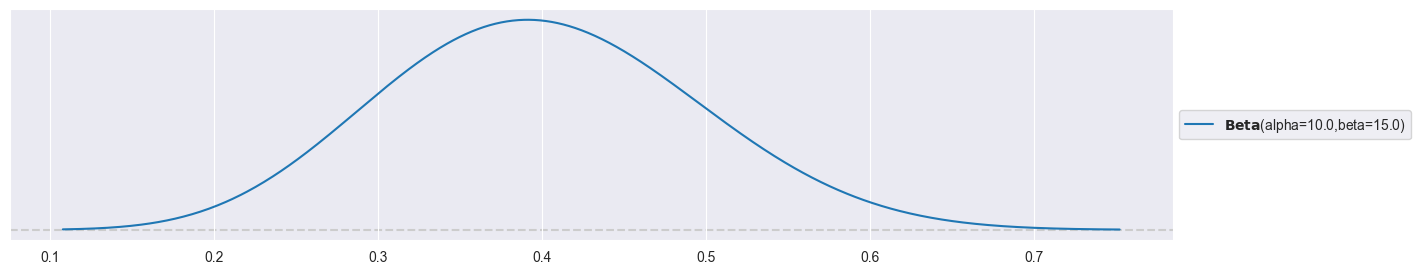

In [2]:
beta = 15
alpha = 2/3 * beta
pz.Beta(alpha, beta).plot_pdf()
print( "alpha = {}, beta = {}".format( alpha, beta ) )

However Beta(6,9) or Beta(12,18) could also be reasonable!

### b)

A scientist has created a new test for a rare disease. They expect that the test is accurate
$80\%$ of the time with a variance of $0.005$.

$\displaystyle{\frac{\alpha}{\beta} = \frac{E[\pi]}{1-E[\pi]} = 0.8/0.2 = 4} \quad \Rightarrow \alpha = 4\beta$

$\text{Var}[\pi] = \displaystyle{\frac{\alpha\beta}{(\alpha+\beta)^2 (\alpha + \beta + 1)} = \frac{4\beta^2}{(5\beta)^2 \; (5\beta + 1)} = \frac{4}{25 \; (5\beta + 1)} = 0.005} \; \Rightarrow 5\beta + 1 = \frac{4}{25 \cdot 0.005} \; \Rightarrow \beta = \frac15 \left(\frac{4}{25 \cdot 0.005}-1\right) = 6.2$

In [3]:
beta = 1/5 * (4/(25*0.005)-1)
beta

6.2

In [4]:
alpha = 4*beta
alpha

24.8

<Axes: >

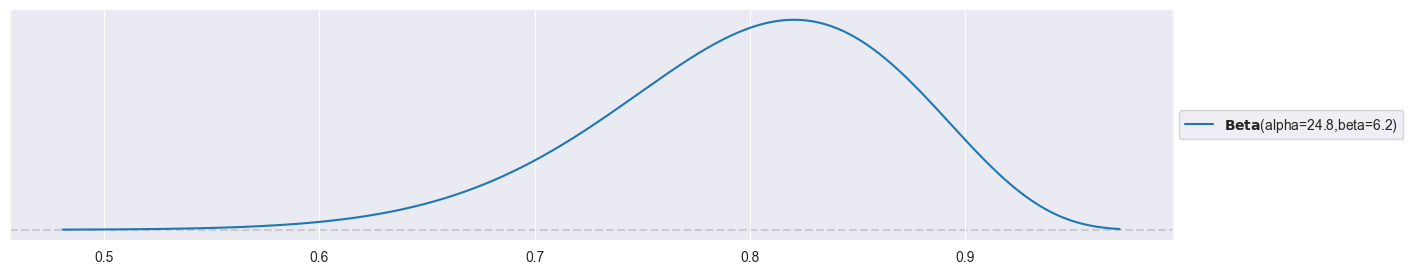

In [5]:
pz.Beta(alpha, beta).plot_pdf()

### c)

Another scientist in the same field claims that they expect the same accuracy, however a
ten times larger variance of $0.05$. Can the beta distribution model this prior expectation
well?

Using the same formula:

In [6]:
beta = 1/5 * (4/(25*0.05)-1)
beta

0.44000000000000006

In [7]:
alpha = 4*beta
alpha

1.7600000000000002

<Axes: >

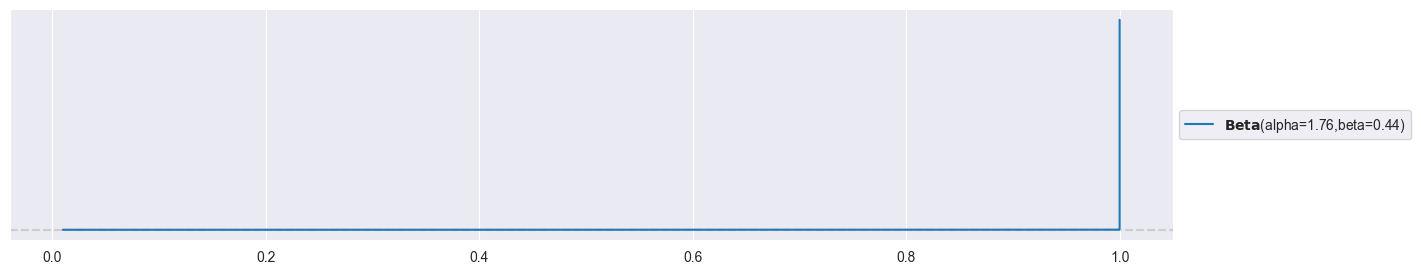

In [8]:
pz.Beta(alpha, beta).plot_pdf()

In [9]:
pz.Beta(alpha, beta).mean(), pz.Beta(alpha, beta).var()

(0.8, 0.05)

Oops! This beta distribution has the correct expectation and variance, but does not model what we want. We would rather have a distribution centered around 0.8. This is the price of reducing all possible prior to a two-dimensional family (parameterized by $\alpha$ and $\beta$). An alternative might be a truncated normal distribution:

<Axes: >

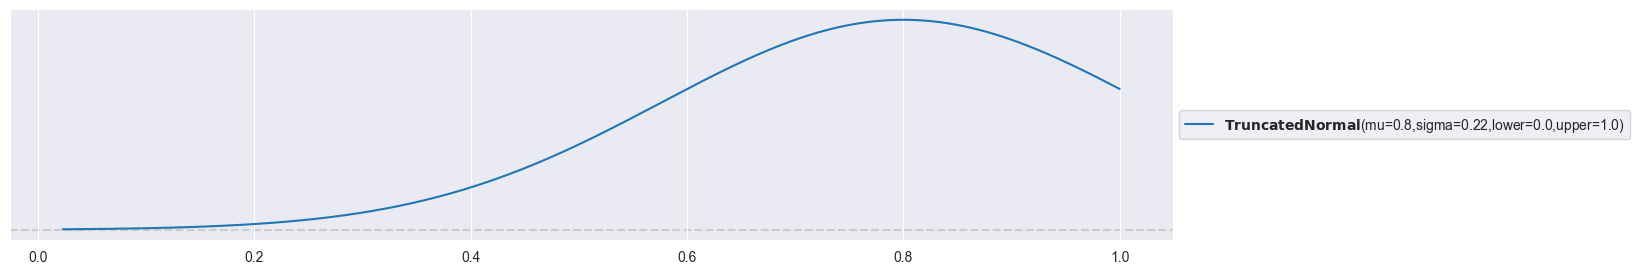

In [10]:
pz.TruncatedNormal(mu=0.8, sigma=np.sqrt(0.05), lower=0, upper=1).plot_pdf()

However it's hard to say whether this is what we want and depends on the application. You might try with more bounded distributions that are listed [here](https://reference.wolfram.com/language/guide/BoundedDomainDistributions.html).

### d)

Your Aunt Jo is a successful mushroom hunter. She boasts: “I expect to find enough
mushrooms to feed myself and my co-workers at the auto-repair shop $90\%$ of the time,
but if I had to give you a likely range it would be between $85\%$ and $100\%$ of the time.”

Ratio through expectation:

$\frac{\alpha}{\beta} = \frac{E[\pi]}{1-E[\pi]} = \frac{0.9}{0.1} = 9$.

Tuning by hand, trying until the range is more or less correct:

<Axes: >

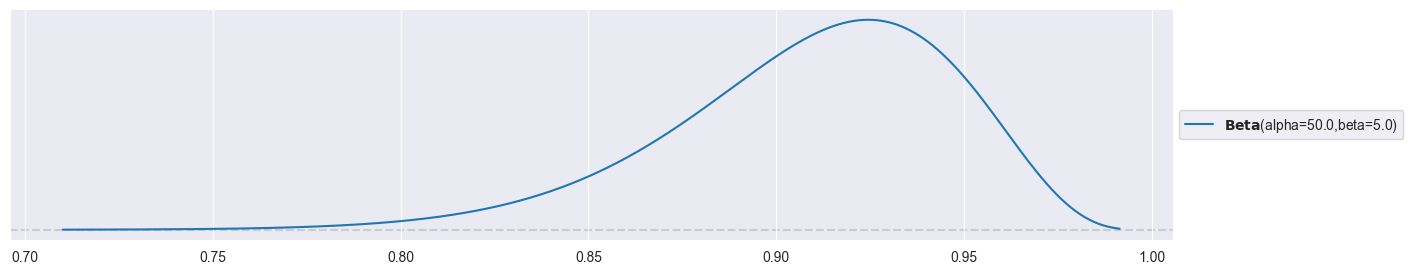

In [11]:
beta = 5 # tried 1, 2, 3, 4, 5
alpha = 10*beta
pz.Beta( alpha, beta ).plot_pdf()

Have reached the desired prior only approximately using the beta distribution! It could allow for a bit more room towards 100%.

### e)

Sal (who is a touch hyperbolic) just interviewed for a job, and doesn't know how to describe
their chances of getting an offer. They say: “I couldn't read my interviewer's expression!
I either really impressed them and they are absolutely going to hire me, or I made a terrible
impression and they are burning my resumé as we speak.”

This calls for a beta distribution with $\alpha, \beta < 1$ !

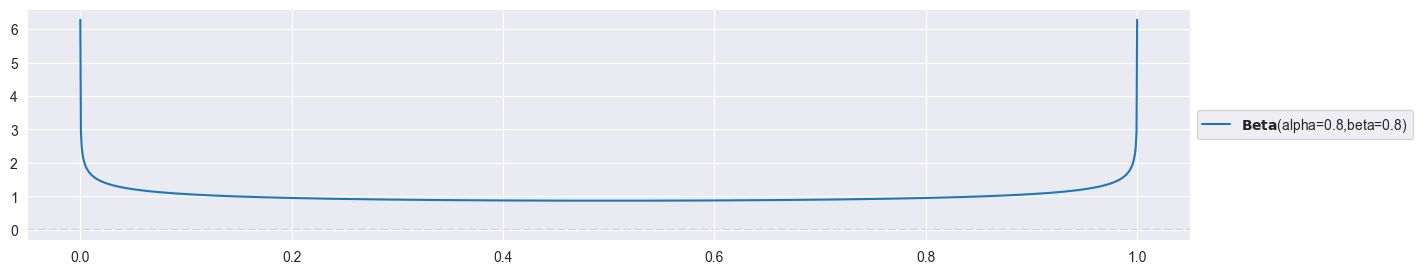

In [12]:
pz.Beta( alpha=0.8, beta=0.8 ).plot_pdf()
plt.yticks(np.arange(0,7,1));

## Exercise 2

Heidi and Peter both like **Älplermagronen** very much (Swiss dish with macaroni, potatoes,
onions, cream, a lot of cheese and apple purée). However, they strongly disagree and often
argue about one critical point: whether the apple purée should be mixed with the rest or be
served separately.

- Heidi, who does not like mixing, says:  
  “I'm very sure that almost nobody mixes the apple purée with the rest!
   I would say that around $5\%$ of the population are doing it, maybe up to $10\%$, but
   certainly not $20\%$!”
- Peter, who likes it very much, argues:  
  “I do not believe this! I would guess that the ratio is about fifty-fifty!”  
  (He seems however less sure in his statement than Heidi.)

Soon after, Peter participates in a dinner where he is the only one out of $6$ people who mixes
their apple purée with the rest.

### a)

Use beta-binomial family!

Prior for Heidi by iteratively trying a few values for $\alpha$ and $\beta$ (might be slightly different from yours):

What conjugate family do you choose to model the proportion $q$ of the Swiss population
that mixes their apple purée with the rest? Elicit priors that reflect the opinions of Heidi and
Peter well and visualize them (e.g. with PreliZ).

<Axes: >

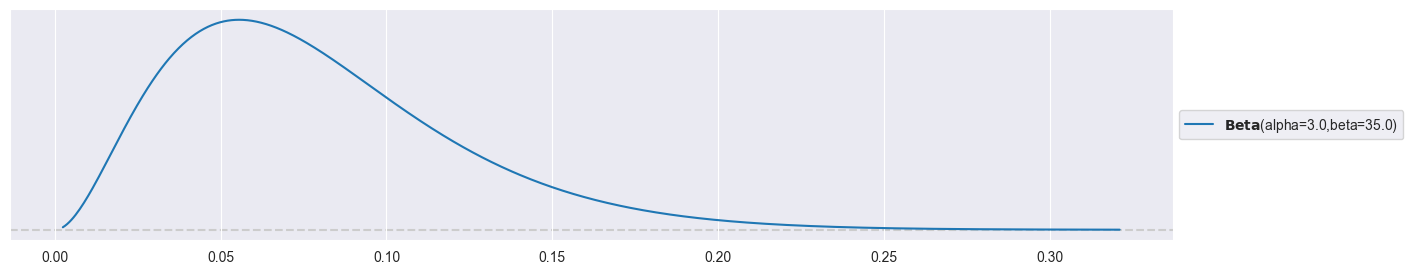

In [13]:
alpha_heidi = 3
beta_heidi = 35
pz.Beta(alpha=alpha_heidi, beta=beta_heidi).plot_pdf()

Prior for Peter (again, you might differ):

<Axes: >

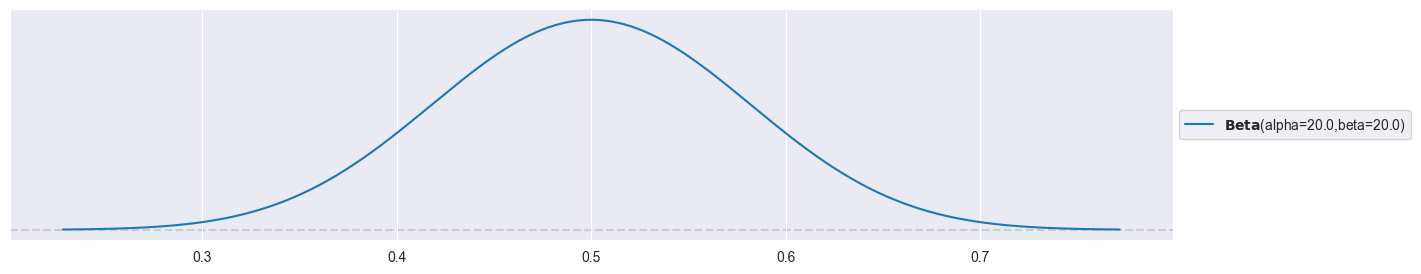

In [14]:
alpha_peter = 20
beta_peter = 20
pz.Beta(alpha=alpha_peter, beta=beta_peter).plot_pdf()

### b)

Compute the parameters of Heidi's and Peter's posterior distributions. How do their opinions
change in the light of data? Compare to their prior distributions.

Experiment (dinner):

In [15]:
n = 6
k = 1

#### Heidi's posterior

Text(0.5, 1.0, "Evolution of Heidi's opinion (blue: prior, orange: posterior)")

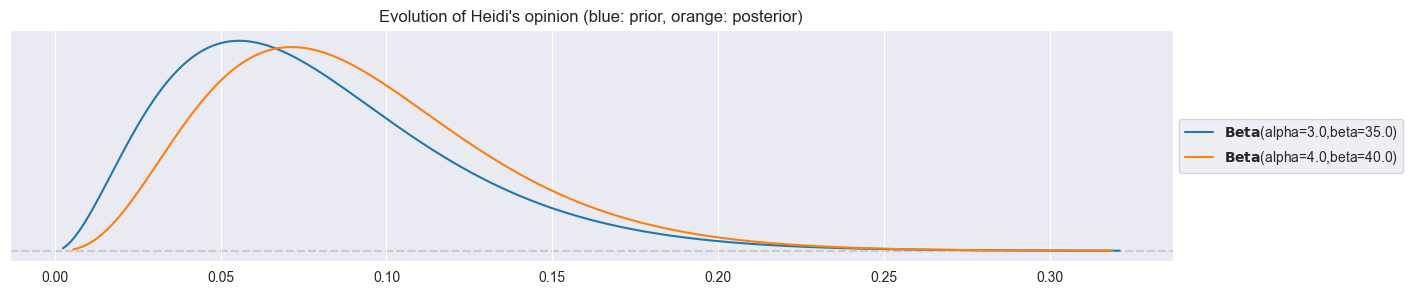

In [16]:
pz.Beta(alpha=alpha_heidi, beta=beta_heidi).plot_pdf()
pz.Beta(alpha=alpha_heidi+k, beta=beta_heidi+n-k).plot_pdf()
plt.title("Evolution of Heidi's opinion (blue: prior, orange: posterior)")

The change is almost not visible! Compare prior and posterior means:

In [17]:
pz.Beta(alpha=alpha_heidi, beta=beta_heidi).mean(), pz.Beta(alpha=alpha_heidi+k, beta=beta_heidi+n-k).mean()

(0.07894736842105263, 0.09090909090909091)

A marginal move towards higher percentages from 8% to 9%.

#### Peter's posterior

Text(0.5, 1.0, "Evolution of Peter's opinion (blue: prior, orange: posterior)")

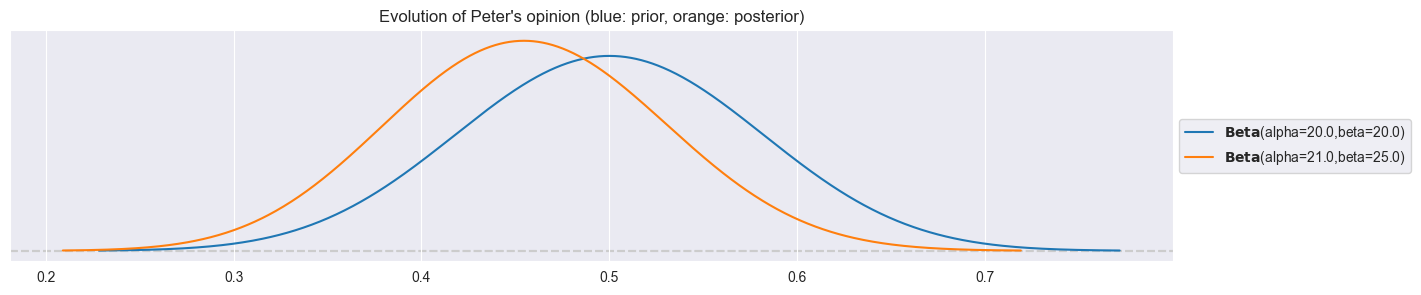

In [18]:
pz.Beta(alpha=alpha_peter, beta=beta_peter).plot_pdf()
pz.Beta(alpha=alpha_peter+k, beta=beta_peter+n-k).plot_pdf()
plt.title("Evolution of Peter's opinion (blue: prior, orange: posterior)")

The move is a bit stronger towards lower ratios. Means:

In [19]:
pz.Beta(alpha=alpha_peter, beta=beta_peter).mean(), pz.Beta(alpha=alpha_peter+k, beta=beta_peter+n-k).mean()

(0.5, 0.45652173913043476)

His mean belief went from 50% to 46%.

### c)

How much would it change for Heidi's posterior opinion if instead of just Peter **all** of the
$6$ participants had mixed? Could Peter convince her with this data? If not, how many people
would they have needed to be (all mixing) to increase the expectation of Heidi's opinion to at
least $50\%$?

Text(0.5, 1.0, "Evolution of Heidi's opinion if all 6 people would have mixed (blue: prior, orange: posterior)")

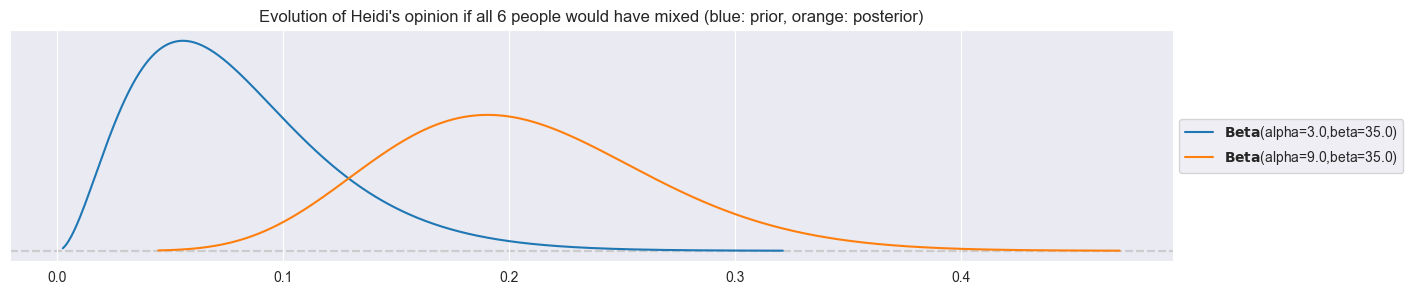

In [20]:
k = 6
pz.Beta(alpha=alpha_heidi, beta=beta_heidi).plot_pdf()
pz.Beta(alpha=alpha_heidi+k, beta=beta_heidi+n-k).plot_pdf()
plt.title("Evolution of Heidi's opinion if all 6 people would have mixed (blue: prior, orange: posterior)")

Heidi would move to a mode/average of almost 20%! This is a big change for her, however she is still far away from being convinced by Peter.

What number of people who all mix their apple puré would be necessary to put her posterior mean up to 50%?

With preliz:

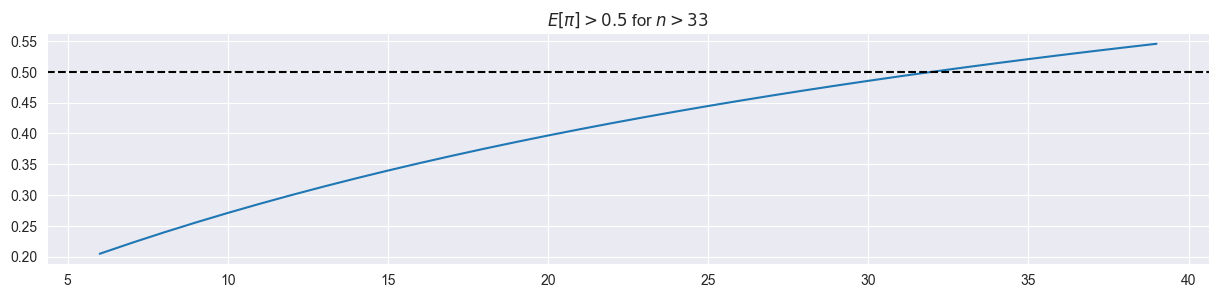

In [21]:
n_range = np.arange(6, 40)
posterior_means = np.array( [pz.Beta(alpha=alpha_heidi+n, beta=beta_heidi+n-n).mean() for n in n_range] ) # n=k
plt.plot( n_range, posterior_means )
plt.axhline( 0.5, c="black", ls="--" )
plt.title("$E[\pi] > 0.5$ for $n > {}$".format(6+np.argmax(posterior_means > 0.5)));

with pandas:

In [22]:
df = pd.DataFrame({'n': n_range, 'posterior_mean': posterior_means})
df[df.posterior_mean > 0.5] 

,n,posterior_mean
27,33,0.507042
28,34,0.513889
29,35,0.520548
30,36,0.527027
31,37,0.533333
32,38,0.539474
33,39,0.545455


To convince Heidi, 33 people would have needed to attend the dinner and mix their apple puré with the rest!

## Exercise 3

In this exercise, you are going to explore some of the maths of the **beta–binomial family**,
just to get to know its inner workings a bit better.

### a)

$$
\begin{eqnarray}
E[\pi] &=& \int_0^1 \pi \; p(\pi; \alpha, \beta) \; \text{d}\pi = \int_0^1 \pi \;  \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\; \Gamma(\beta)} \; \pi^{\alpha-1} \; (1-\pi)^{\beta-1} \; \text{d}\pi\\
&=& \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\; \Gamma(\beta)} \; \int_0^1 \pi^{\alpha} \; (1-\pi)^{\beta-1} \; \text{d}\pi\\
&=& \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\; \Gamma(\beta)} \; \frac{\Gamma(\alpha+1) \; \Gamma(\beta)}{\Gamma(\alpha+\beta+1)} = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)} \; \frac{\Gamma(\alpha+1)}{\Gamma(\alpha+\beta+1)}\\
&=& \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)} \; \frac{\alpha \; \Gamma(\alpha)}{(\alpha+\beta) \; \Gamma(\alpha+\beta)}\\
&=& \frac{\alpha}{\alpha+\beta}
\end{eqnarray}
$$

The beta family of distributions parameterized by $\alpha$ and $\beta$ is given by
$$
p(\pi; \alpha, \beta)
= \frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\,\Gamma(\beta)}
  \,\pi^{\alpha-1} (1-\pi)^{\beta-1},
\qquad 0 \le \pi \le 1.
$$

Compute its mean
$$
\mathbb{E}[\pi] = \int_{0}^{1} \pi\, p(\pi; \alpha, \beta)\, d\pi.
$$

Hints: Use that
$$
\int_{0}^{1} p(\pi; \alpha, \beta)\, d\pi
= \frac{\Gamma(\alpha)\,\Gamma(\beta)}{\Gamma(\alpha + \beta)}
$$
and that $\Gamma(z + 1) = z\,\Gamma(z)$.

### b)

$$
\frac{\alpha+k}{\alpha+\beta+n} = w \; \frac{\alpha}{\alpha+\beta} + (1-w) \; \frac{k}{n}
$$

$$
\Rightarrow \frac{\alpha+k}{\alpha+\beta+n} = w \; \left( \frac{\alpha}{\alpha+\beta} - \frac{k}{n} \right) + \frac{k}{n}
$$

$$
w = \frac{\frac{\alpha+k}{\alpha+\beta+n} - \frac{k}{n}}{\frac{\alpha}{\alpha+\beta} - \frac{k}{n}} = \frac{\frac{\alpha n + k n - \alpha k - \beta k - nk}{n(\alpha+\beta+n)}}{\frac{\alpha n - k\alpha -k\beta}{(\alpha+\beta) n}} = \frac{\alpha n - \alpha k - \beta k}{\alpha+\beta+n} \; \frac{\alpha+\beta}{\alpha n - \alpha k - \beta k} = \frac{\alpha+\beta}{\alpha+\beta+n}
$$

$$
1-w = 1 - \frac{\alpha+\beta}{\alpha+\beta+n} = \frac{\alpha+\beta+n}{\alpha+\beta+n} - \frac{\alpha+\beta}{\alpha+\beta+n} = \frac{n}{\alpha+\beta+n}
$$

If a $\mathrm{Beta}(\alpha, \beta)$ prior is used and $n$ experiments are run, resulting in $k$ positive
outcomes, then we update our belief to a $\mathrm{Beta}(\alpha + k, \beta + n - k)$ posterior.

Show that the posterior mean $\mathbb{E}[\pi \mid Y = k]$ can be decomposed into a weighted
sum of the prior mean $\mathbb{E}[\pi]$ and the empirical mean $\bar y = k/n$:
$$
\mathbb{E}[\pi \mid Y = k]
= \frac{\alpha + \beta}{\alpha + \beta + n}\,\mathbb{E}[\pi]
+ \frac{n}{\alpha + \beta + n}\,\bar y.
$$

Hint: Make the ansatz
$$
\underbrace{\frac{\alpha + k}{\alpha + \beta + n}}_{\mathbb{E}[\pi \mid Y = k]}
= w \,\underbrace{\frac{\alpha}{\alpha + \beta}}_{\mathbb{E}[\pi]}
+ (1-w)\,\underbrace{\frac{k}{n}}_{\bar y},
$$
solve for $w$ and compute $1-w$.

### c)

* $\displaystyle{\lim_{n\to 0}} \; E[\pi|Y=k] = E[\pi]\quad$  (prior dominates the posterior mean)
* $\displaystyle{\lim_{n\to \infty}} \; E[\pi|Y=k] = \bar{y}\quad$  (empirical mean dominates the posterior mean)

What are the limits
$$
\lim_{n \to 0} \mathbb{E}[\pi \mid Y = k]
\qquad \text{and} \qquad
\lim_{n \to \infty} \mathbb{E}[\pi \mid Y = k]?
$$
Give an interpretation. How do you need to choose $\alpha$ and $\beta$ such that data dominate
less for large $n$?

large $n$ dominate less if $\alpha$ and $\beta$ (and consequently $\alpha+\beta$ are also large. This is equivalent to a strong prior (the larger $\alpha$ and $\beta$, the smaller the variance). It makes sense that it takes more data to convince a strong prior than it takes to convince a weak prior (with small values for $\alpha$ and $\beta$).

## Exercise 4

The posterior is a balance between the prior and the data (through the likelihood). In this
exercise you will run some simulations to demonstrate this.

You have bought a magic coin with inherent long-run probability for heads $\pi = 0.7$. This is
indicated on the wrapping and you got assured by the magic store owner that this value can be
trusted (in the long run, of course). You choose to play a bit around with the magic coin to
explore the properties of the beta–binomial conjugate family.

### a)

Create three datasets by running three simulations with
$$
n_1 = 10, \quad n_2 = 30, \quad n_3 = 100
$$
coin tosses. Store the values of $k$ (which vary each time you re-run the code). Compute the
frequentist estimate $\hat\pi_i = k_i/n_i$ for each dataset.

Simulation:

In [23]:
n1 = 10; n2 = 30; n3 = 100
pi_true = 0.7
k1 = np.sum( np.random.choice([0,1], p=[1-pi_true, pi_true], size=n1) )
k2 = np.sum( np.random.choice([0,1], p=[1-pi_true, pi_true], size=n2) )
k3 = np.sum( np.random.choice([0,1], p=[1-pi_true, pi_true], size=n3) )

Frequentist estimate:

In [24]:
k1/n1, k2/n2, k3/n3

(0.8, 0.7333333333333333, 0.71)

### b)

You want to try four different priors:

- Uninformed prior: $\mathrm{Beta}(1, 1)$
- Weakly informed prior: $\mathrm{Beta}(10, 4.5)$
- Strongly informed prior: $\mathrm{Beta}(184, 80)$
- Wrong, strongly informed prior: $\mathrm{Beta}(80, 184)$

Visualize these four priors using e.g. PreliZ.

Uniform, uninformed prior:

<Axes: >

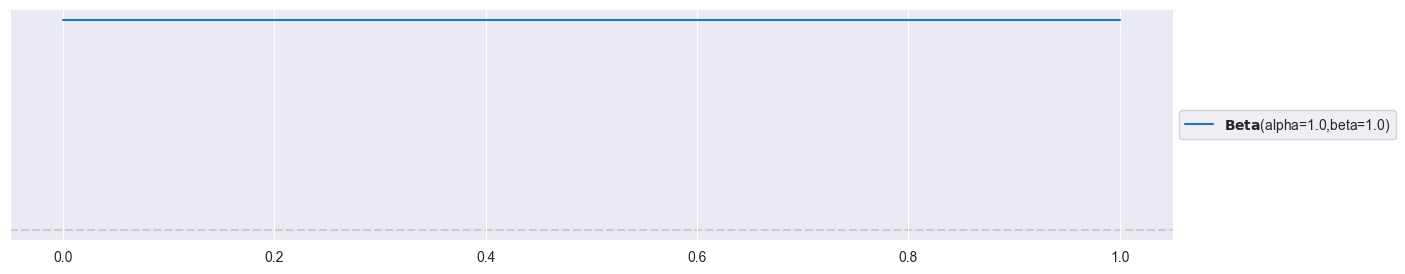

In [25]:
alpha1 = beta1 = 1
pz.Beta(alpha1, beta1).plot_pdf()

Weakly-informed prior:

/Users/marbetschar/Development/marbetschar/notes/.venv/lib/python3.9/site-packages/numba/np/ufunc/dufunc.py:287: RuntimeWarning: divide by zero encountered in nb_logpdf
  return super().__call__(*args, **kws)


<Axes: >

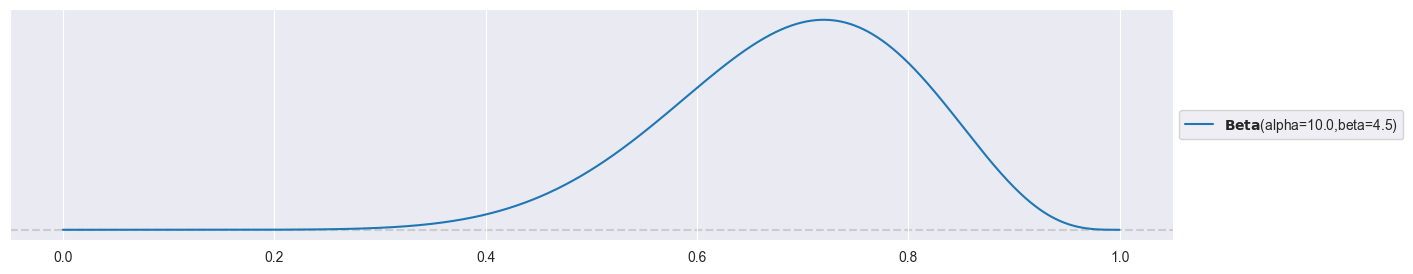

In [26]:
alpha2 = 10
beta2 = 4.5
pz.Beta(alpha2, beta2).plot_pdf( support="full" )

Strongly-informed prior:

<Axes: >

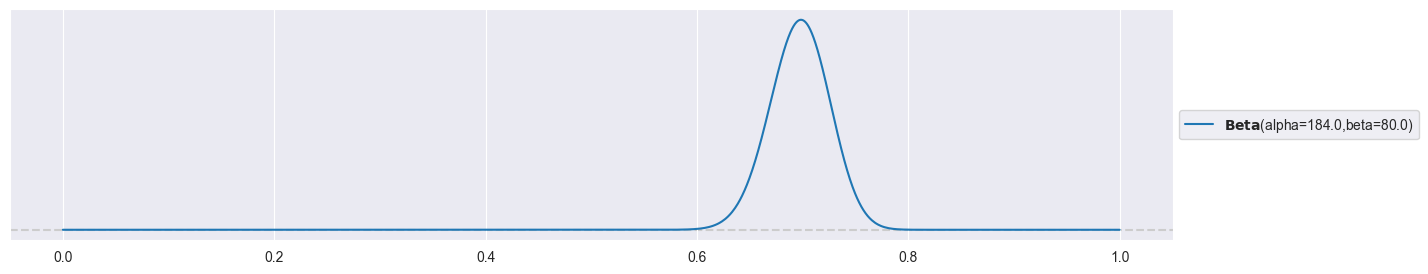

In [27]:
alpha3 = 184
beta3 = 80
pz.Beta(alpha3, beta3).plot_pdf( support="full" )

Strongly-informed, wrong prior:

<Axes: >

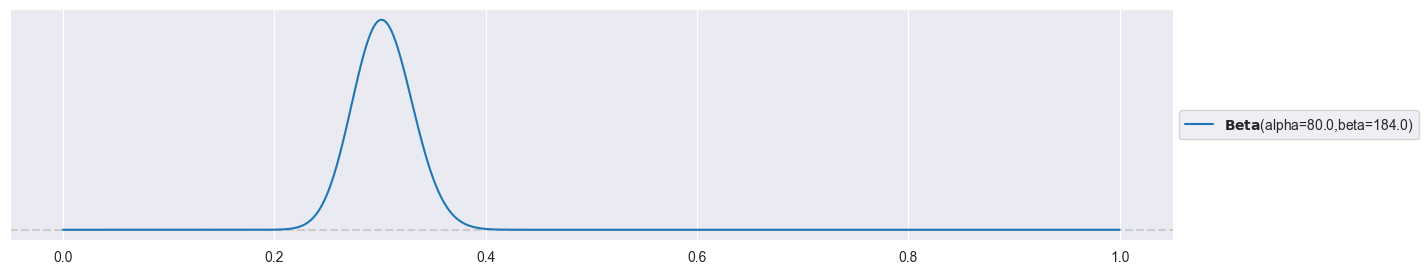

In [28]:
alpha4 = 80
beta4 = 184
pz.Beta(alpha4, beta4).plot_pdf( support="full" )

### c)

Copy the function `plot_beta_binomial()` from `week2_tongue_rolling.ipynb` (week 2 materials)
to your notebook and run the definition so that you have access to it later.

Now create three plots using `plot_beta_binomial()` for the three different datasets using the
uninformed $\mathrm{Beta}(1,1)$ prior. Can you reproduce some conclusions from the lecture? Do
the same for the weakly informed, the strongly informed and the wrong, strongly informed
prior and provide comments on what you observe.

Since you sampled the coin tosses randomly, you may re-run the cells for this exercise in your
notebook – you may be surprised how some results vary by quite a bit!

Use function from tongue rolling notebook:

In [29]:
from scipy import stats

def plot_beta_binomial( alpha, beta, n, k, figsize=(13,3) ):
    # create figure
    plt.figure( figsize=figsize )
    
    # numeric evaluation range for pi
    pi_range = np.linspace(0, 1, 1000)
    
    # prior
    prior = [stats.beta.pdf(pi, a=alpha, b=beta) for pi in pi_range]
    plt.plot( pi_range, prior, alpha=0.5, label="prior", c="orange" )
    plt.fill_between( pi_range, prior, alpha=0.3, color="orange" )

    # scaled likelihood
    likelihood = [stats.binom.pmf(n=n, k=k, p=pi) for pi in pi_range]
    likelihood /= np.sum( likelihood ) * (pi_range[1]-pi_range[0])
    plt.plot( pi_range, likelihood, alpha=0.5, label="(scaled) likelihood", c="blue" )
    plt.fill_between( pi_range, likelihood, alpha=0.3, color="blue" )

    # posterior
    posterior = [stats.beta.pdf(pi, a=alpha+k, b=beta+n-k) for pi in pi_range]
    plt.plot( pi_range, posterior, alpha=0.5, label="posterior", color="darkgreen" )
    plt.fill_between( pi_range, posterior, alpha=0.3, color="darkgreen" )
    
    # enable legend and set descriptive title
    plt.legend( fontsize=14 )
    plt.title( "$\\alpha = {}, \; \\beta={}, \; n={}, \; k={}$".format(alpha, beta, n, k) )

#### For uniform prior:

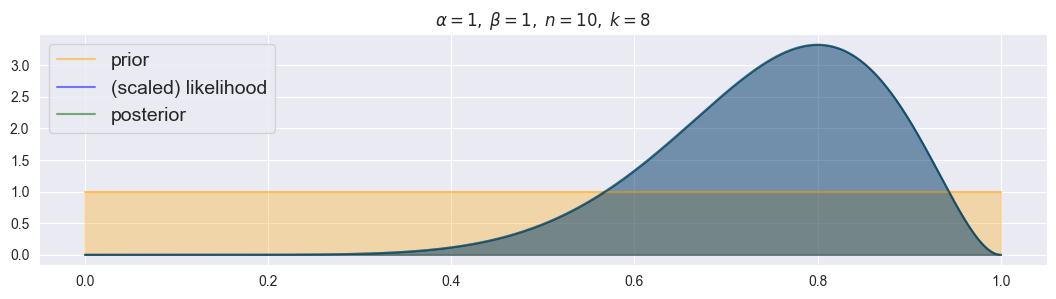

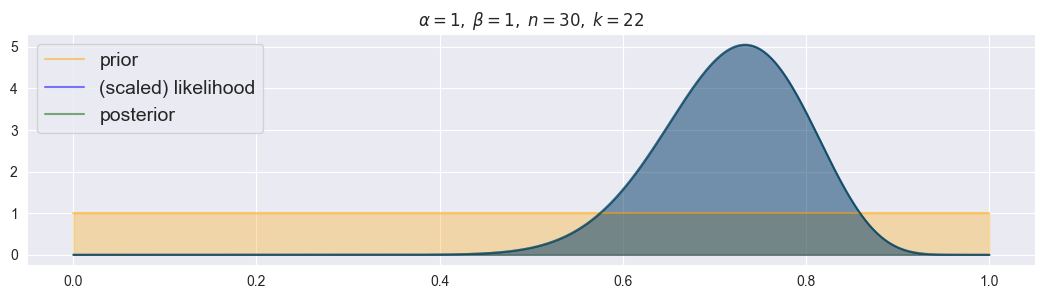

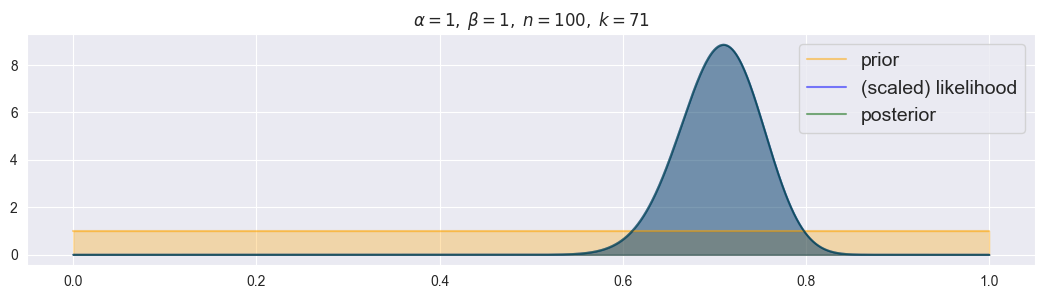

In [30]:
for i, (n,k) in enumerate( [(n1,k1),(n2,k2),(n3,k3)] ):
    plot_beta_binomial( alpha1, beta1, n, k )

The more data, the more narrow the posterior! (and the closer to the true value)

#### For weakly-informed prior:

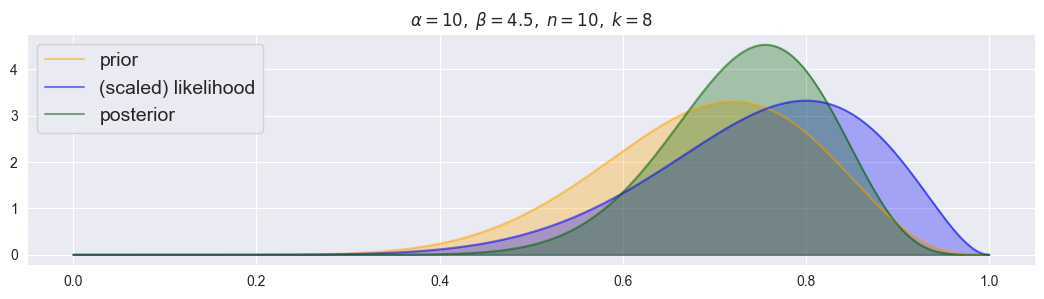

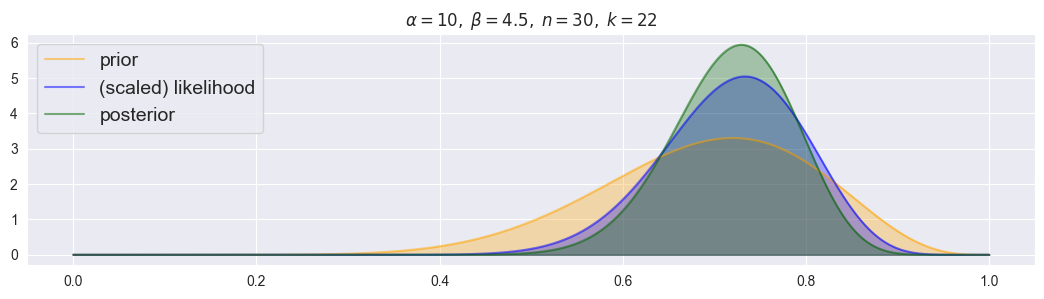

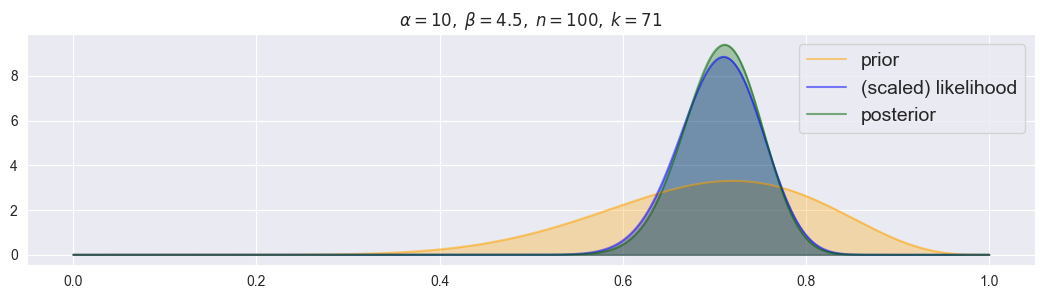

In [31]:
for i, (n,k) in enumerate( [(n1,k1),(n2,k2),(n3,k3)] ):
    plot_beta_binomial( alpha2, beta2, n, k )

The posterior is always distributed as a compromise between prior and (scaled) likelihood. For more data, the posterior is drawn more to the scaled likelihood and narrower.

#### For strongly-informed prior:

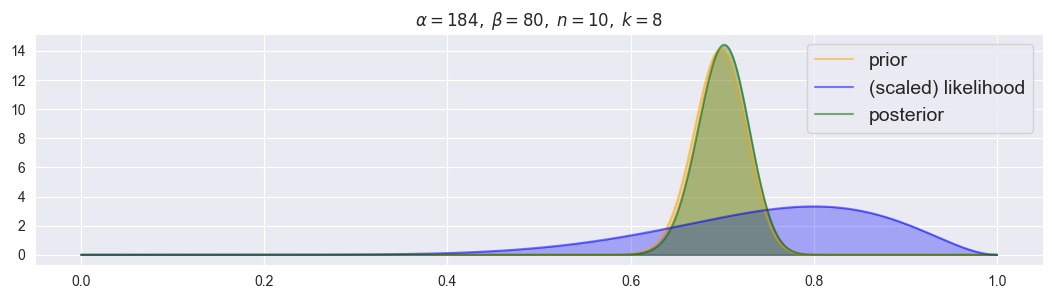

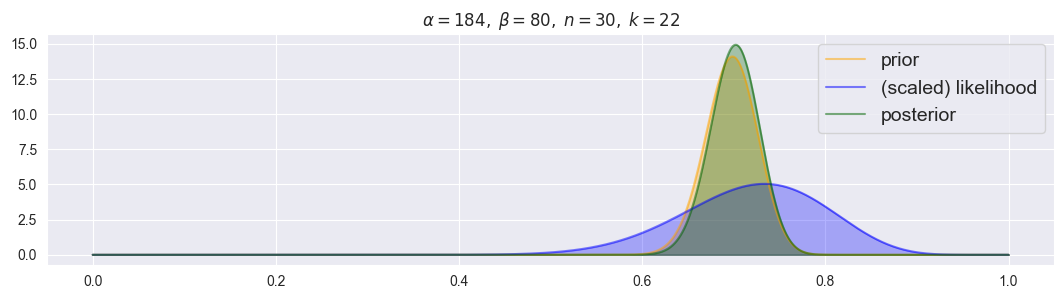

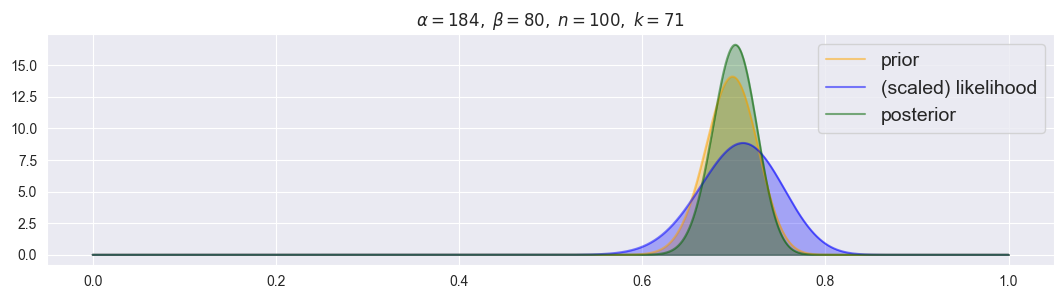

In [32]:
for i, (n,k) in enumerate( [(n1,k1),(n2,k2),(n3,k3)] ):
    plot_beta_binomial( alpha3, beta3, n, k )

Posterior is drawn to prior from the beginning! Even with 100 samples the prior still dominates the likelihood.

#### For wrong, strongly-informed prior:

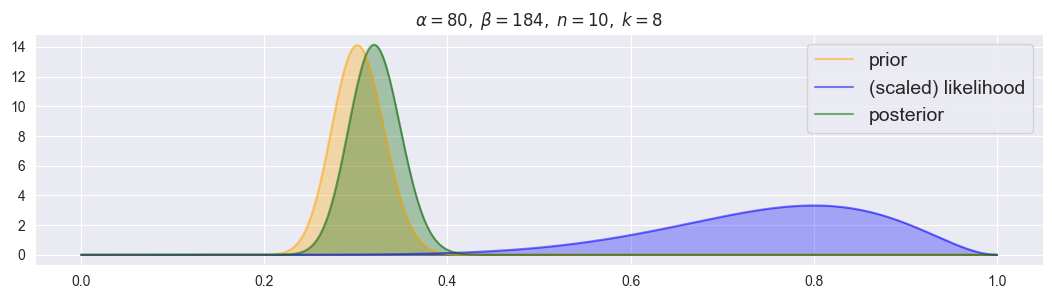

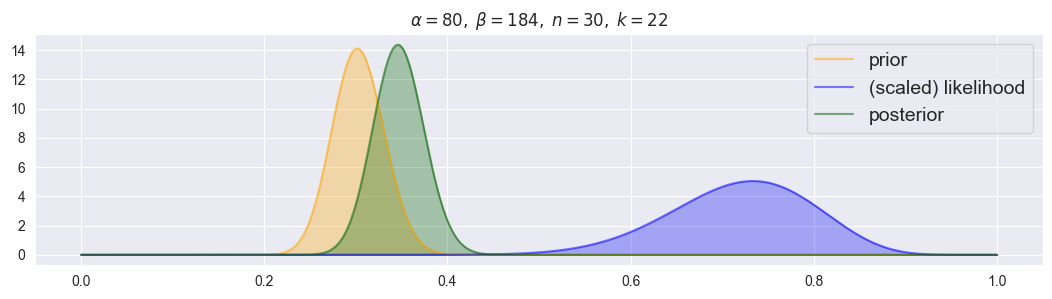

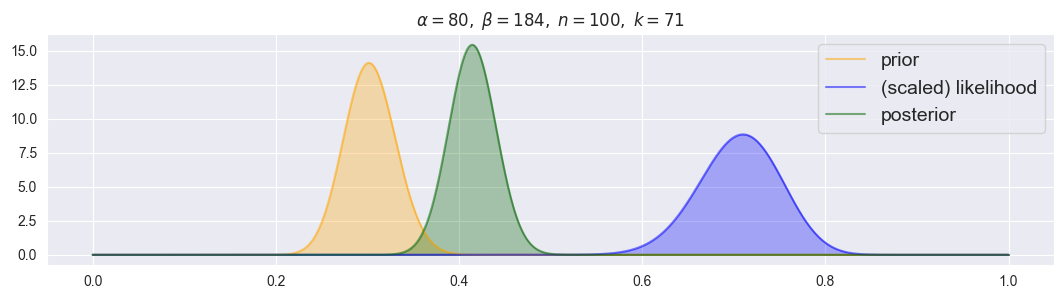

In [33]:
for i, (n,k) in enumerate( [(n1,k1),(n2,k2),(n3,k3)] ):
    plot_beta_binomial( alpha4, beta4, n, k )

The wrong prior strongly attracts the posterior, with more data it is only slowly attracted towards the likelihood.

## Exercise 5

A lecturer wants to model the number of absences due to sickness at the final exam of a
linear algebra module. He conducted the following measurements so far (HS = *Herbstsemester*,
FS = *Frühlingssemester*):

| Semester | HS 19 | FS 20 | HS 20 | FS 21 | HS 21 | FS 22 | HS 22 | FS 23 | HS 23 | FS 24 |
|----------|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| Absences |   0   |   2   |  NA   |   5   |   2   |   1   |   0   |   1   |   1   |   2   |

In HS 20, the students were relieved of the exam during the onset of the Covid-19 pandemic.

### a)

Try out different values using preliz (note that they use $\alpha$ instead of $s$ and $\beta$ instead of $r$):

Due to previous experiences (however without recording data), the lecturer thinks that typically
one absence needs to be expected and that he will probably not reach the maximum of 5 again
(during the pandemic).

Use a library such as PreliZ to devise an appropriate gamma distribution that reflects this
prior opinion.

(-0.5, 8.0)

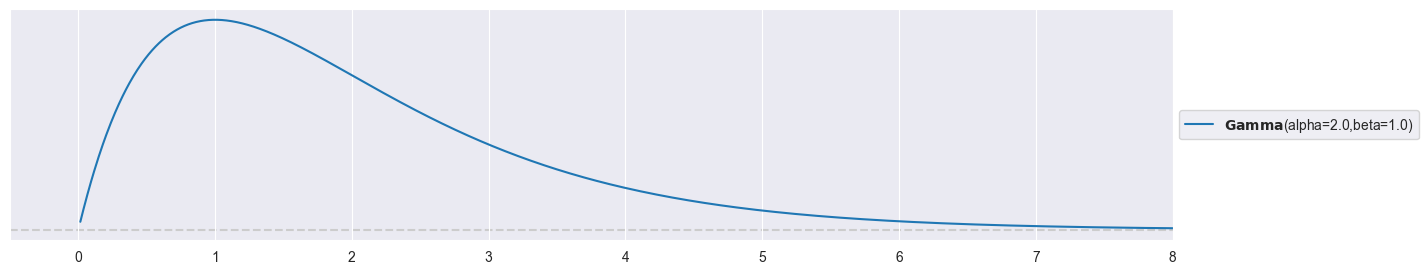

In [34]:
s = 2
r = 1
pz.Gamma(s, r).plot_pdf()
plt.xlim(-0.5,8)

(your prior should look similar but your values for $s$ and $r$ might differ!)

### b)

What is the lecturer's posterior distribution for the number of absences? Use the gamma–Poisson
conjugate family and its update rule. Compute also posterior mean, mode and standard deviation
as summaries.

In [35]:
y = [0,2,5,2,1,0,1,1,2]

Update rule: $\text{Gamma}(s, r) \to \text{Gamma}(s+\sum_i y_i, r+n)$

Plot prior and posterior:

Text(0.5, 1.0, 'blue: prior, orange: posterior')

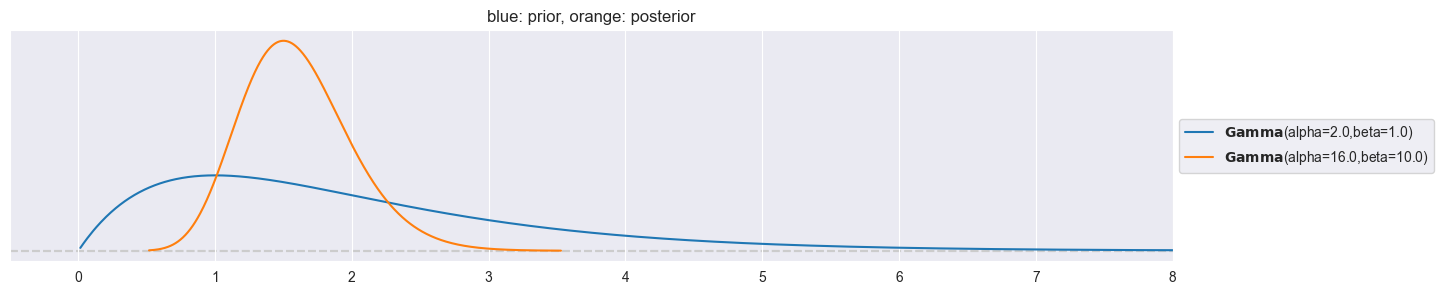

In [36]:
pz.Gamma(s, r).plot_pdf()
pz.Gamma(s+np.sum(y), r+len(y)).plot_pdf()
plt.xlim(-0.5,8)
plt.title("blue: prior, orange: posterior")

In [37]:
pz.Gamma(s+np.sum(y), r+len(y)).summary()

Gamma(mean=1.6, median=1.57, std=0.4, lower=0.94, upper=2.43)

### c)

Let's demonstrate this!

Draw samples from prior:

Unlike the lecturer, you do not trust closed-form maths and want to do a simulation to compute
posterior mean and standard deviation. You plan to implement it in a similar way as you
simulated a beta–binomial posterior in the previous exercise:

1. Draw $N = 10\,000$ samples $\lambda_i$ from the prior distribution.
2. Draw 9 samples of absences $k$ for each $\lambda_i$ using a Poisson likelihood (same sample
   number as in the provided data).
3. Filter out only samples that are the same as the recorded data (order does not matter,
   you may use sorting).

Argue that this simulation is very inefficient and might not produce the results you desire,
getting even worse if you collect more data. Code is not required, but you might nevertheless
try it.

In [38]:
N = 10000
lmbd_vals = pz.Gamma(s, r).rvs(N)
lmbd_vals.shape

(10000,)

Draw 9 Poisson samples for each lambda and sort them, as order does not matter:

In [39]:
samples = [sorted(list(pz.Poisson(mu=lmbd).rvs(9))) for lmbd in lmbd_vals]
samples[:10]

[[1, 1, 1, 2, 2, 3, 3, 4, 4],
 [1, 1, 1, 1, 1, 2, 2, 3, 3],
 [0, 0, 1, 1, 1, 3, 3, 3, 3],
 [0, 0, 0, 1, 1, 1, 2, 2, 3],
 [0, 0, 0, 1, 1, 2, 2, 3, 3],
 [0, 0, 0, 0, 1, 1, 1, 2, 3],
 [1, 1, 2, 2, 2, 3, 3, 3, 4],
 [1, 1, 2, 2, 3, 3, 4, 4, 8],
 [0, 1, 1, 2, 2, 2, 2, 4, 5],
 [0, 0, 1, 1, 1, 1, 3, 3, 3]]

In [40]:
match = [s == sorted(list(y)) for s in samples]
lmbd_vals[match]

array([1.73618752, 1.77452226, 1.40789387, 1.26644421, 1.94895517,
       2.74506573, 1.09932507, 1.77456877, 1.58848297, 1.32779745,
       1.15489985, 1.26967635, 2.0311676 ])

This is a very small number of samples to estimate a mean, a standard deviation or even a probability distribution!

In [41]:
np.mean( lmbd_vals[match] ), np.std( lmbd_vals[match] )

(1.624998985925156, 0.4359340148058533)

Interestingly the values are nontheless not too far away. Nevertheless, this probably gets much worse if we collect more data..

**Conclusion:** Need a much more effective sampler! (MCMC - next week)

## Exercise 6

For “original” Bayesians the case is clear: the prior comes *before* any data and it is not allowed
to leak any information from the data into the prior! (You could compare this with leaking test
data into a training set in machine learning.)

However, there is not just one faction of Bayesians. **Empirical Bayesians** argue that it does
not matter so much if enough data are provided and only summaries of the data are used as
input to the prior. In this exercise you will use such an ansatz to solve the previous exercise
without the need to “painfully” elicit a prior before (it will get worse – you just had to do it
for one parameter; what about a regression model with 40 parameters?).

### a)

The expectation and variance of the gamma distribution are given as
$$
\mu = \mathbb{E}[\lambda] = \frac{s}{r},
\qquad
\sigma^2 = \operatorname{Var}[\lambda] = \frac{s}{r^2}.
$$
Compute $s$ and $r$ as functions of $\mu$ and $\sigma$.

Compute formulas for $s$ and $r$ given $\mu$ and $\sigma^2$:

$\mu = \frac{s}{r} \quad \Rightarrow s = r \; \mu$

$\sigma^2 = \frac{s}{r^2} = \frac{\mu}{r} \quad \Rightarrow r = \frac{\mu}{\sigma^2}$

### b)

Compute $\mu$ and $\sigma$ from the data (see previous exercise) and create and visualize the
resulting empirical prior. Compare it to your prior distribution elicited in the previous exercise.

Compute $\mu$ and $\sigma^2$ from data:

In [42]:
mu = np.mean( y )
var = np.var( y )

In [43]:
r_emp = mu/var
s_emp = r_emp * mu
r_emp, s_emp

(0.7682926829268291, 1.195121951219512)

Compare priors:

<Axes: >

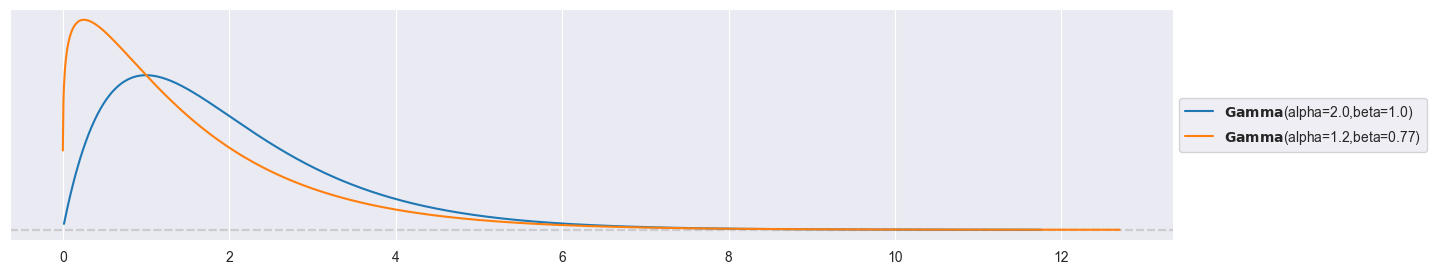

In [44]:
pz.Gamma( s, r ).plot_pdf()
pz.Gamma( s_emp, r_emp ).plot_pdf()

The empirical prior is a bit more right-skewed and concentrated on lower numbers of absences.

### c)

Use the data to update your prior and visualize the resulting posterior. Compare it to the
posterior you got in the previous exercise. How big is the difference? Should you curse
empirical Bayesians, or do they maybe have a point in making a Bayesian analysis a bit less
rigorous but more simple?

We will use empirical Bayes with Bayesian linear regression models starting from Week 6.

Compare posteriors:

<Axes: >

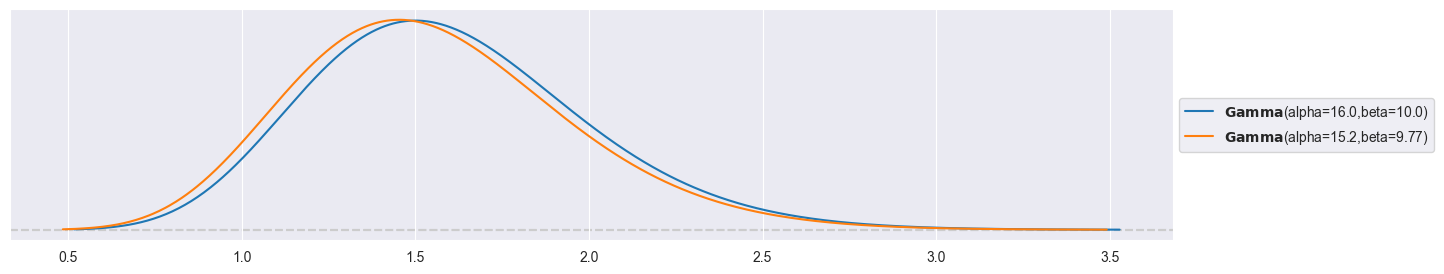

In [45]:
pz.Gamma( s+np.sum(y), r+len(y) ).plot_pdf()
pz.Gamma( s_emp+np.sum(y), r_emp+len(y) ).plot_pdf()

The posteriors are however very similar, maybe empirical Bayes has a point.. Given enough data points (10 in this case), the posterior is already quite robust against **small** changes in the prior. This would of course be different, if the elicited prior from the previous exercise and the empirical Bayes prior from this exercise would differ significantly!